In [1]:
!export PATH="/home/fzaidoun/anaconda3/envs/him/bin:$PATH"

In [2]:
!conda install -c conda-forge dynesty -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/fzaidoun/anaconda3/envs/him

  added / updated specs:
    - dynesty


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    dynesty-1.1                |     pyh44b312d_0          70 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          70 KB

The following NEW packages will be INSTALLED:

  dynesty            conda-forge/noarch::dynesty-1.1-pyh44b312d_0



dynesty-1.1          | 70 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [1]:
import numpy as np
from astropy.io import ascii
from functions import *

In [2]:
print("loading data")
cols = ['Mstar',
        'flag_vsquared',
        'flag_voidfinder']
data = ascii.read('../data_flags_updated_Nov1.dat', include_names=cols)
Mstar = data['Mstar']

print("loading classification")
#classification V^2
wall_v2 = np.argwhere(data['flag_vsquared'] == 0).flatten()
void_v2 = np.argwhere(data['flag_vsquared'] == 1).flatten()
edge_v2 = np.argwhere(data['flag_vsquared'] == 2).flatten()
out_v2 = np.argwhere(data['flag_vsquared'] == 9).flatten()

#classification voidfinder
wall_vf = np.argwhere(data['flag_voidfinder'] == 0).flatten()
void_vf = np.argwhere(data['flag_voidfinder'] == 1).flatten()
edge_vf = np.argwhere(data['flag_voidfinder'] == 2).flatten()
out_vf = np.argwhere(data['flag_voidfinder'] == 9).flatten()

## property variables
print("loading property model variables")

# data and range
data1_wall_vf = remove_nan(Mstar[wall_vf])
data2_void_vf = remove_nan(Mstar[void_vf])
data1_wall_v2 = remove_nan(Mstar[wall_v2])
data2_void_v2 = remove_nan(Mstar[void_v2])
bins_ = np.linspace(5.9,12, 135)
label_vf = 'Mstar_VF'
label_v2 = 'Mstar_V2'

loading data
loading classification
loading property model variables


plotting histograms of data...


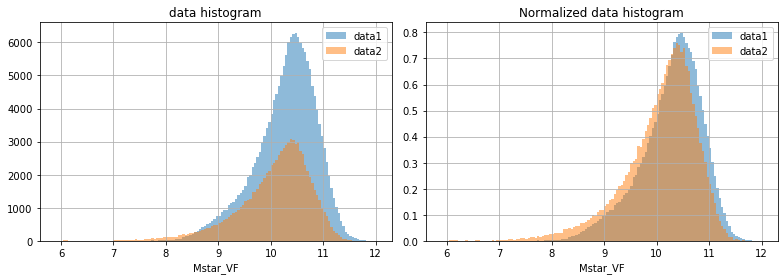

In [3]:
plot_hist(data1_wall_vf,data2_void_vf,bins_,label_vf)


In [4]:
bounds1 = [[2, 3],     # s ........ scale factor (peak 1 to 2) #2.5

           [1000, 7000.],  # a ........ skew normal 1 amplitude # 2000 and 100
           [10, 11],     # mu_a ..... skew normal 1 location  # 0.5
           [0.1,3],     # sigma_a .. skew normal 1 scale #0.2
           [-10., 10.],    # a_skew ... skew normal 1 skew

           [0, 7000.],  # b ........ skew normal 2 amplitude #6100 and 150
           [11.5, 12],     # mu_b ..... skew normal 2 location #0.9  # should not overlap with mu_a
           [0.1, 2],     # sigma_b .. skew normal 2 scale #0.1
           [-10., 10.]]    # b_skew ... skew normal 2 skew


In [5]:
def prior_xform1(u):
    """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

    Parameters
    ----------
    u : ndarray
        Array of uniform random numbers between 0 and 1.

    Returns
    -------
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    """
    s       = uniform(0.1, 10., u[0])
    a       = jeffreys(1., 1e4, u[1])
    mu_a    = uniform(10, 11, u[2])
    sigma_a = jeffreys(0.1, 2., u[3])
    xi_a    = uniform(-10., 10., u[4])
    b       = jeffreys(1., 1e4, u[5])
    mu_b    = uniform(11.5, 12., u[6])
    sigma_b = jeffreys(0.05, 2., u[7])
    xi_b    = uniform(-10., 10., u[8])

    return s, a, mu_a, sigma_a, xi_a, b, mu_b, sigma_b, xi_b

In [8]:
# bounds1_ = [[100., 5000.],  # a ........ skew normal 1 amplitude #2000
#         [0.0, 0.7],     # mu_a ..... skew normal 1 location #0.5
#         [0.1, 2.0],     # sigma_a .. skew normal 1 scale #0.7
#         [-10., 10.],    # a_skew ... skew normal 1 skew
#         [100., 5000.],  # b ........ skew normal 2 amplitude #6100
#         [0.7, 1.5],     # mu_b ..... skew normal 2 location #0.9
#         [0.1, 2.0],     # sigma_b .. skew normal 2 scale #0.4
#         [-10., 10.]]    # a_skew ... skew normal 2 skew

# bounds2_ = [[100., 1000.],   # g ........ skew normal 3 amplitude #200
#             [0.0, 0.7],     # mu_g ..... skew normal 3 location #0.5
#             [0.1, 2.0],     # sigma_g .. skew normal 3 scale #0.6
#             [-10., 10.],    # g_skew ... skew normal 3 skew
#             [100., 1500.],   # d ........ skew normal 4 amplitude #800
#             [0.7, 1.5],     # mu_d ..... skew normal 4 location #0.8
#             [0.05, 2.0],     # sigma_d .. skew normal 4 scale #0.3
#             [-10., 10.]]    # d_skew ... skew normal 4 skew
# bounds2 = bounds1_ + bounds2_

VoidFinder (VF)
plotting histograms of data...


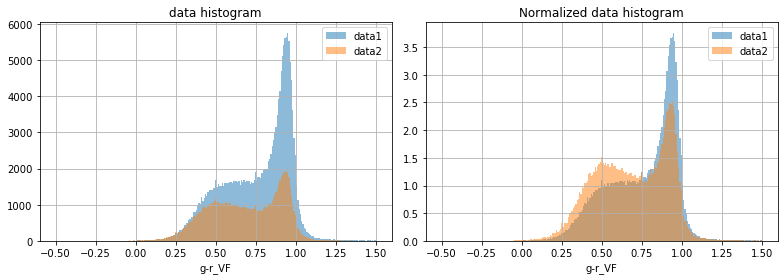

Running Model 1 using VF...


In [6]:

# def prior_xform2(u):
#     """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

#     Parameters
#     ----------
#     u : ndarray
#         Array of uniform random numbers between 0 and 1.

#     Returns
#     -------
#     priors : ndarray
#         Transformed random numbers giving prior ranges on model parameters.
#     """
#     a       = jeffreys(1., 1e4, u[0])
#     mu_a    = uniform(0., 0.7, u[1])
#     sigma_a = jeffreys(0.1, 2., u[2])
#     xi_a    = uniform(-10., 10., u[3])
#     b       = jeffreys(1., 1e4, u[4])
#     mu_b    = uniform(0.7, 1.5, u[5])
#     sigma_b = jeffreys(0.05, 2., u[6])
#     xi_b    = uniform(-10., 10., u[7])

#     g       = jeffreys(1., 1e4, u[8])
#     mu_g    = uniform(0., 0.7, u[9])
#     sigma_g = jeffreys(0.1, 2., u[10])
#     xi_g    = uniform(-10., 10., u[11])
#     d       = jeffreys(1., 1e4, u[12])
#     mu_d    = uniform(0.7, 1.5, u[13])
#     sigma_d = jeffreys(0.05, 2., u[14])
#     xi_d    = uniform(-10., 10., u[15])

#     return a, mu_a, sigma_a, xi_a, \
#            b, mu_b, sigma_b, xi_b, \
#            g, mu_g, sigma_g, xi_g, \
#            d, mu_d, sigma_d, xi_d


# #for VF
# print("VoidFinder (VF)")
# plot_hist(data1_wall_vf,data2_void_vf,bins_,label_vf)
# #model 1
# print("Running Model 1 using VF...")

running minimizer...this might take a few minutes...
best fit parameters       fun: 63567.62024223313
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.28702205e+04,  2.91041382e-03, -5.79821014e+00,  2.41561792e+00,
       -8.00355342e-03, -4.36557111e-03,  9.38754888e+02, -1.62981452e-01,
        1.31280092e+01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1070
      nit: 91
     njev: 107
   status: 0
  success: True
        x: array([ 2.00000000e+00,  3.74248199e+03,  1.09157623e+01,  9.12919717e-01,
       -3.48844244e+00,  2.31879991e+02,  1.15000000e+01,  1.94988148e+00,
       -1.00000000e+01])


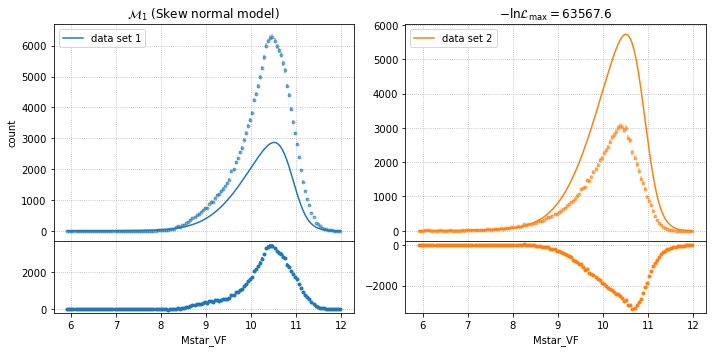

In [6]:
Model_1_fit(bounds1,data1_wall_vf,data2_void_vf,bins_,label_vf)


In [ ]:
Model_1_sampler(prior_xform1,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ1_vf = Model1_output(data1_wall_vf,data2_void_vf,bins_,label_vf)

Running Model 2 using VF...
running minimizer...this might take a few minutes...
plotting best fit results...


iter: 31 | batch: 0 | bound: 0 | nc: 1 | ncall: 33 | eff(%):  5.816 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.167 | dlogz:    inf >  0.010                                           

running the nested sampler... this might take from minutes to hours...


iter: 10210 | batch: 0 | bound: 124 | nc: 25 | ncall: 230950 | eff(%):  4.411 | loglstar:   -inf < -28527.800 <    inf | logz: -28554.602 +/-  0.324 | dlogz: 9883.339 >  0.010                       /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 12669 | batch: 0 | bound: 161 | nc: 25 | ncall: 297409 | eff(%):  4.253 | loglstar:   -inf < -21412.269 <    inf | logz: -21444.431 +/-  0.357 | dlogz: 6755.283 >  0.010                       /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: 

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 18334 | batch: 0 | bound: 272 | nc: 25 | ncall: 545526 | eff(%):  3.358 | loglstar:   -inf < -9681.246 <    inf | logz: -9723.794 +/-  0.411 | dlogz: 2875.560 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 18422 | batch: 0 | bound: 275 | 

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 22165 | batch: 0 | bound: 357 | nc: 25 | ncall: 865567 | eff(%):  2.559 | loglstar:   -inf < -6005.907 <    inf | logz: -6055.636 +/-  0.442 | dlogz: 1432.934 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 22288 | batch: 0 | bound: 360 | nc: 25 | ncall: 873523 | eff(%):  2.550 | loglstar:   -inf < -5937.029 <    inf | logz: -5987.192 +/-  0.443 | dlogz: 1364.281 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserW

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 23743 | batch: 0 | bound: 394 | nc: 25 | ncall: 1057464 | eff(%):  2.244 | loglstar:   -inf < -5097.382 <    inf | logz: -5151.086 +/-  0.460 | dlogz: 1256.986 >  0.010                        /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 23870 | batch: 0 | bound: 397 | 

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 26542 | batch: 0 | bound: 463 | nc: 25 | ncall: 1546646 | eff(%):  1.716 | loglstar:   -inf < -4153.558 <    inf | logz: -4211.263 +/-  0.477 | dlogz: 487.050 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 26596 | batch: 0 | bound: 465 | 

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 29575 | batch: 0 | bound: 534 | nc: 25 | ncall: 2238190 | eff(%):  1.321 | loglstar:   -inf < -3644.142 <    inf | logz: -3706.866 +/-  0.498 | dlogz: 232.256 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 30081 | batch: 0 | bound: 542 | 

sampler output saved as pickle file 'sampler_results_model2_g-r_VF'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 8.90080924e+02  4.70577702e-01  2.69207460e-01  1.38583717e+00
  6.41027659e+02  9.86410223e-01  8.66448873e-02 -3.07576428e+00
  5.48393145e+02  4.29606767e-01  2.66413856e-01  1.33954550e+00
  2.18174933e+02  9.78729658e-01  8.90433673e-02 -2.81621339e+00]
Best fit results: 
Bayesian Evidence for model 2 :  -3350.66755757998


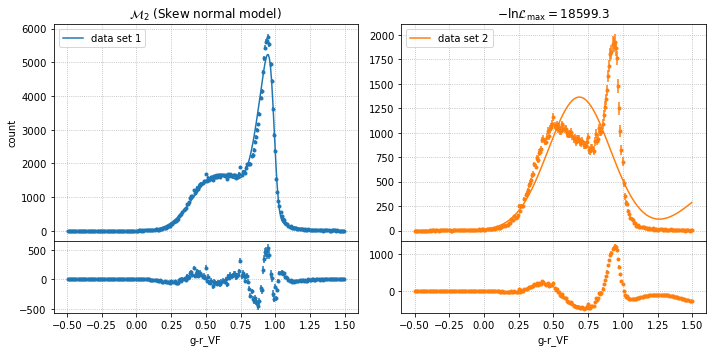

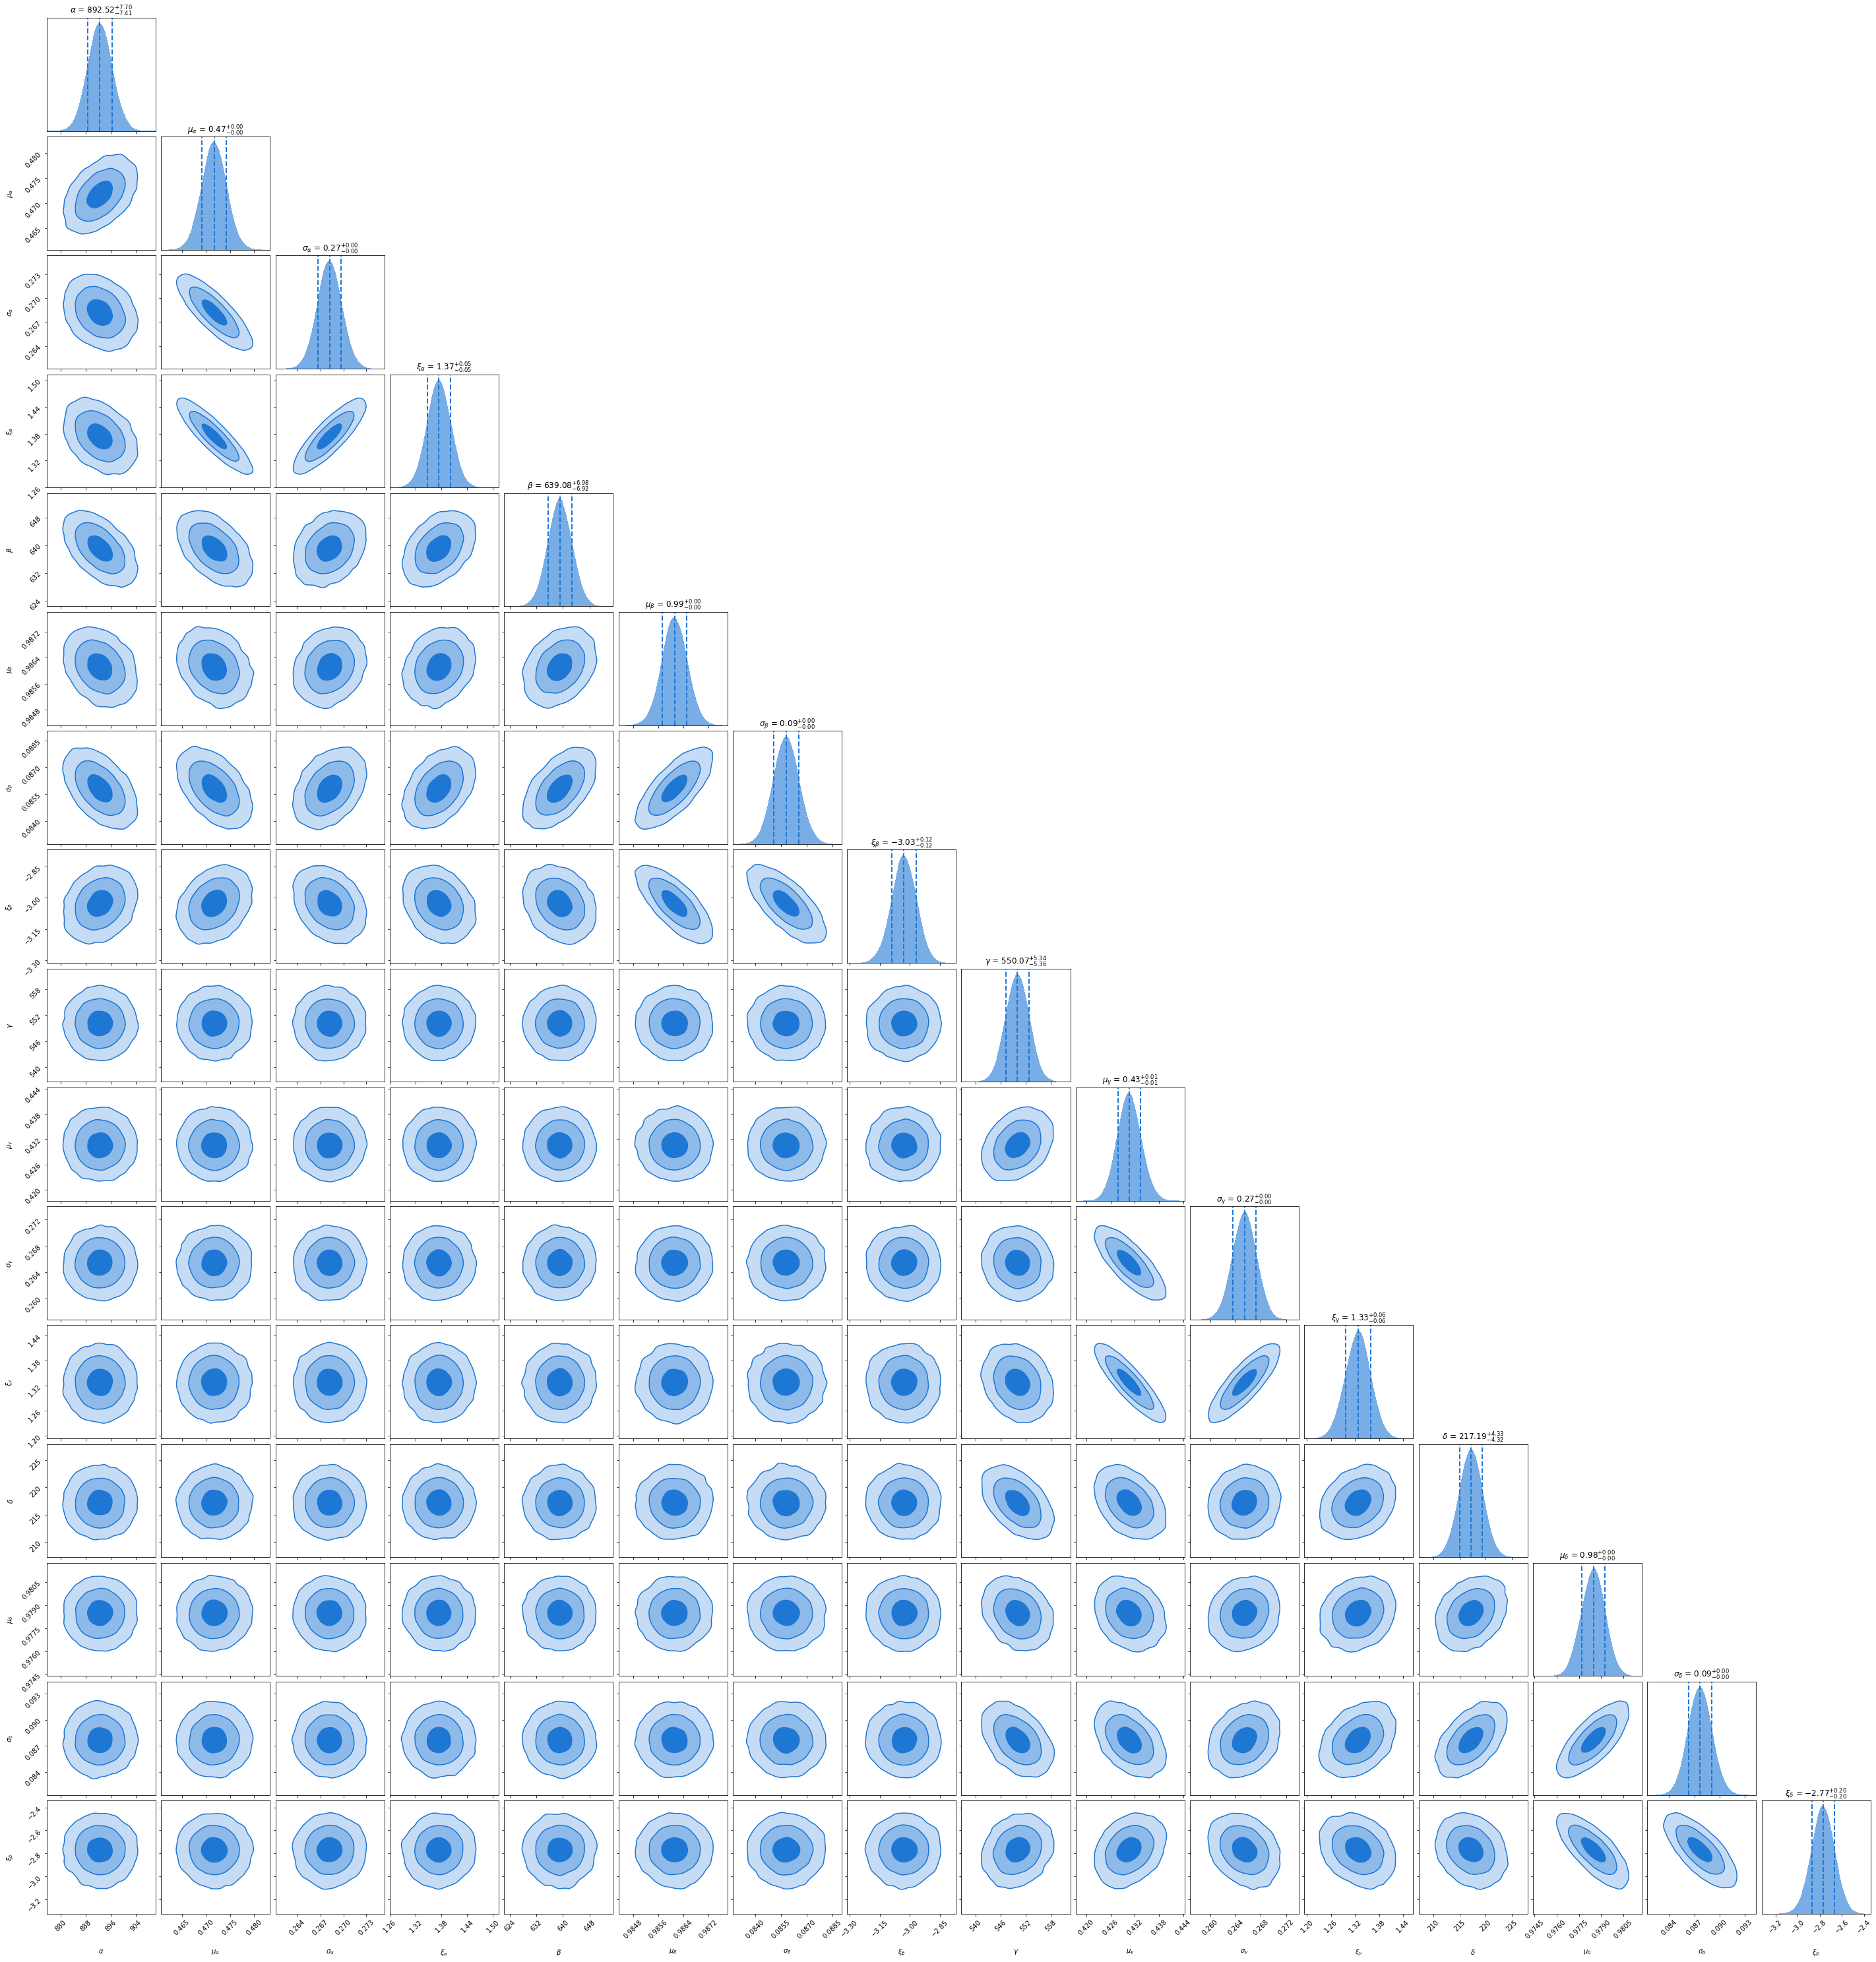

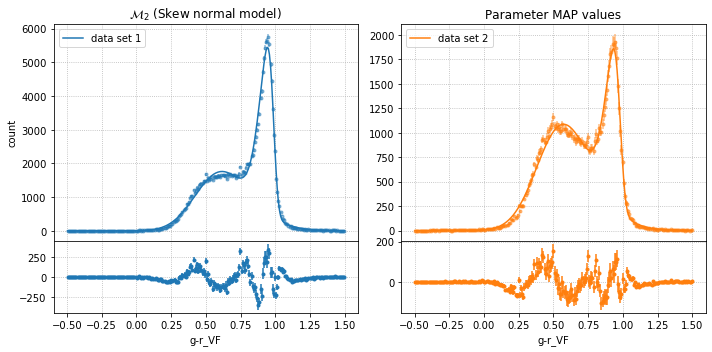

In [9]:
#model2
print("Running Model 2 using VF...")

Model_2_fit(bounds2,data1_wall_vf,data2_void_vf,bins_,label_vf)
Model_2_sampler(prior_xform2,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ2_vf = Model2_output(data1_wall_vf,data2_void_vf,bins_,label_vf)




In [10]:
lnZ1_vf=-6905.661369325146

In [17]:
#Baye's Factor
lnB12_vf = lnZ1_vf - lnZ2_vf
logB12_vf = np.log10(np.e) * lnB12_vf
print("Log10 of Baye's Factor for g-r using VF is: ", logB12_vf)


Log10 of Baye's Factor for g-r using VF is:  -1543.9141956411331


V2
plotting histograms of data...


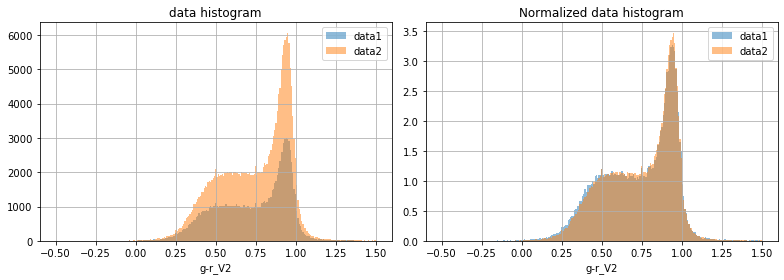

Running Model 1 using V2...
running minimizer...this might take a few minutes...


iter: 1 | batch: 0 | bound: 0 | nc: 1 | ncall: 1 | eff(%):  0.200 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.143 | dlogz:    inf >  0.010                                             

best fit parameters       fun: 1529845.76927917
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.57893582e+05,  2.85034288e+02, -4.04682940e+02,  2.32830644e-02,
        0.00000000e+00,  2.33065939e+02, -1.45136886e+06, -1.88819307e+06,
        2.32830645e-02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 600
      nit: 46
     njev: 60
   status: 0
  success: True
        x: array([2.00000000e+00, 2.00000000e+03, 6.00000000e-01, 2.06285471e-01,
       1.74474433e-01, 6.00000000e+03, 1.00000000e+00, 5.00000000e-01,
       1.36417872e+00])
running the nested sampler... this might take from minutes to hours...


iter: 43979 | batch: 7 | bound: 655 | nc: 2 | ncall: 565580 | eff(%):  7.776 | loglstar: -3803.673 < -3794.703 < -3797.410 | logz: -3850.263 +/-  0.447 | stop:  0.805                                

sampler output saved as pickle file 'sampler_results_model1_g-r_V2'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 1.90383577e+00  5.74552741e+02  4.66391078e-01  2.65422351e-01
  1.23708147e+00  3.43348822e+02  9.85317891e-01  8.51708263e-02
 -2.91165627e+00]
Best fit results: 
Bayesian Evidence for model 1 :  -3850.2611347696406
Running Model 2 using V2...


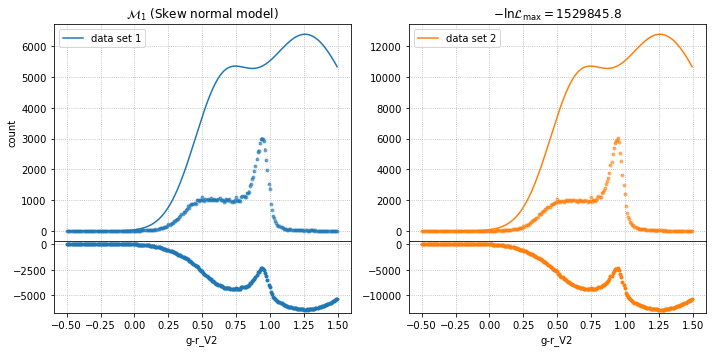

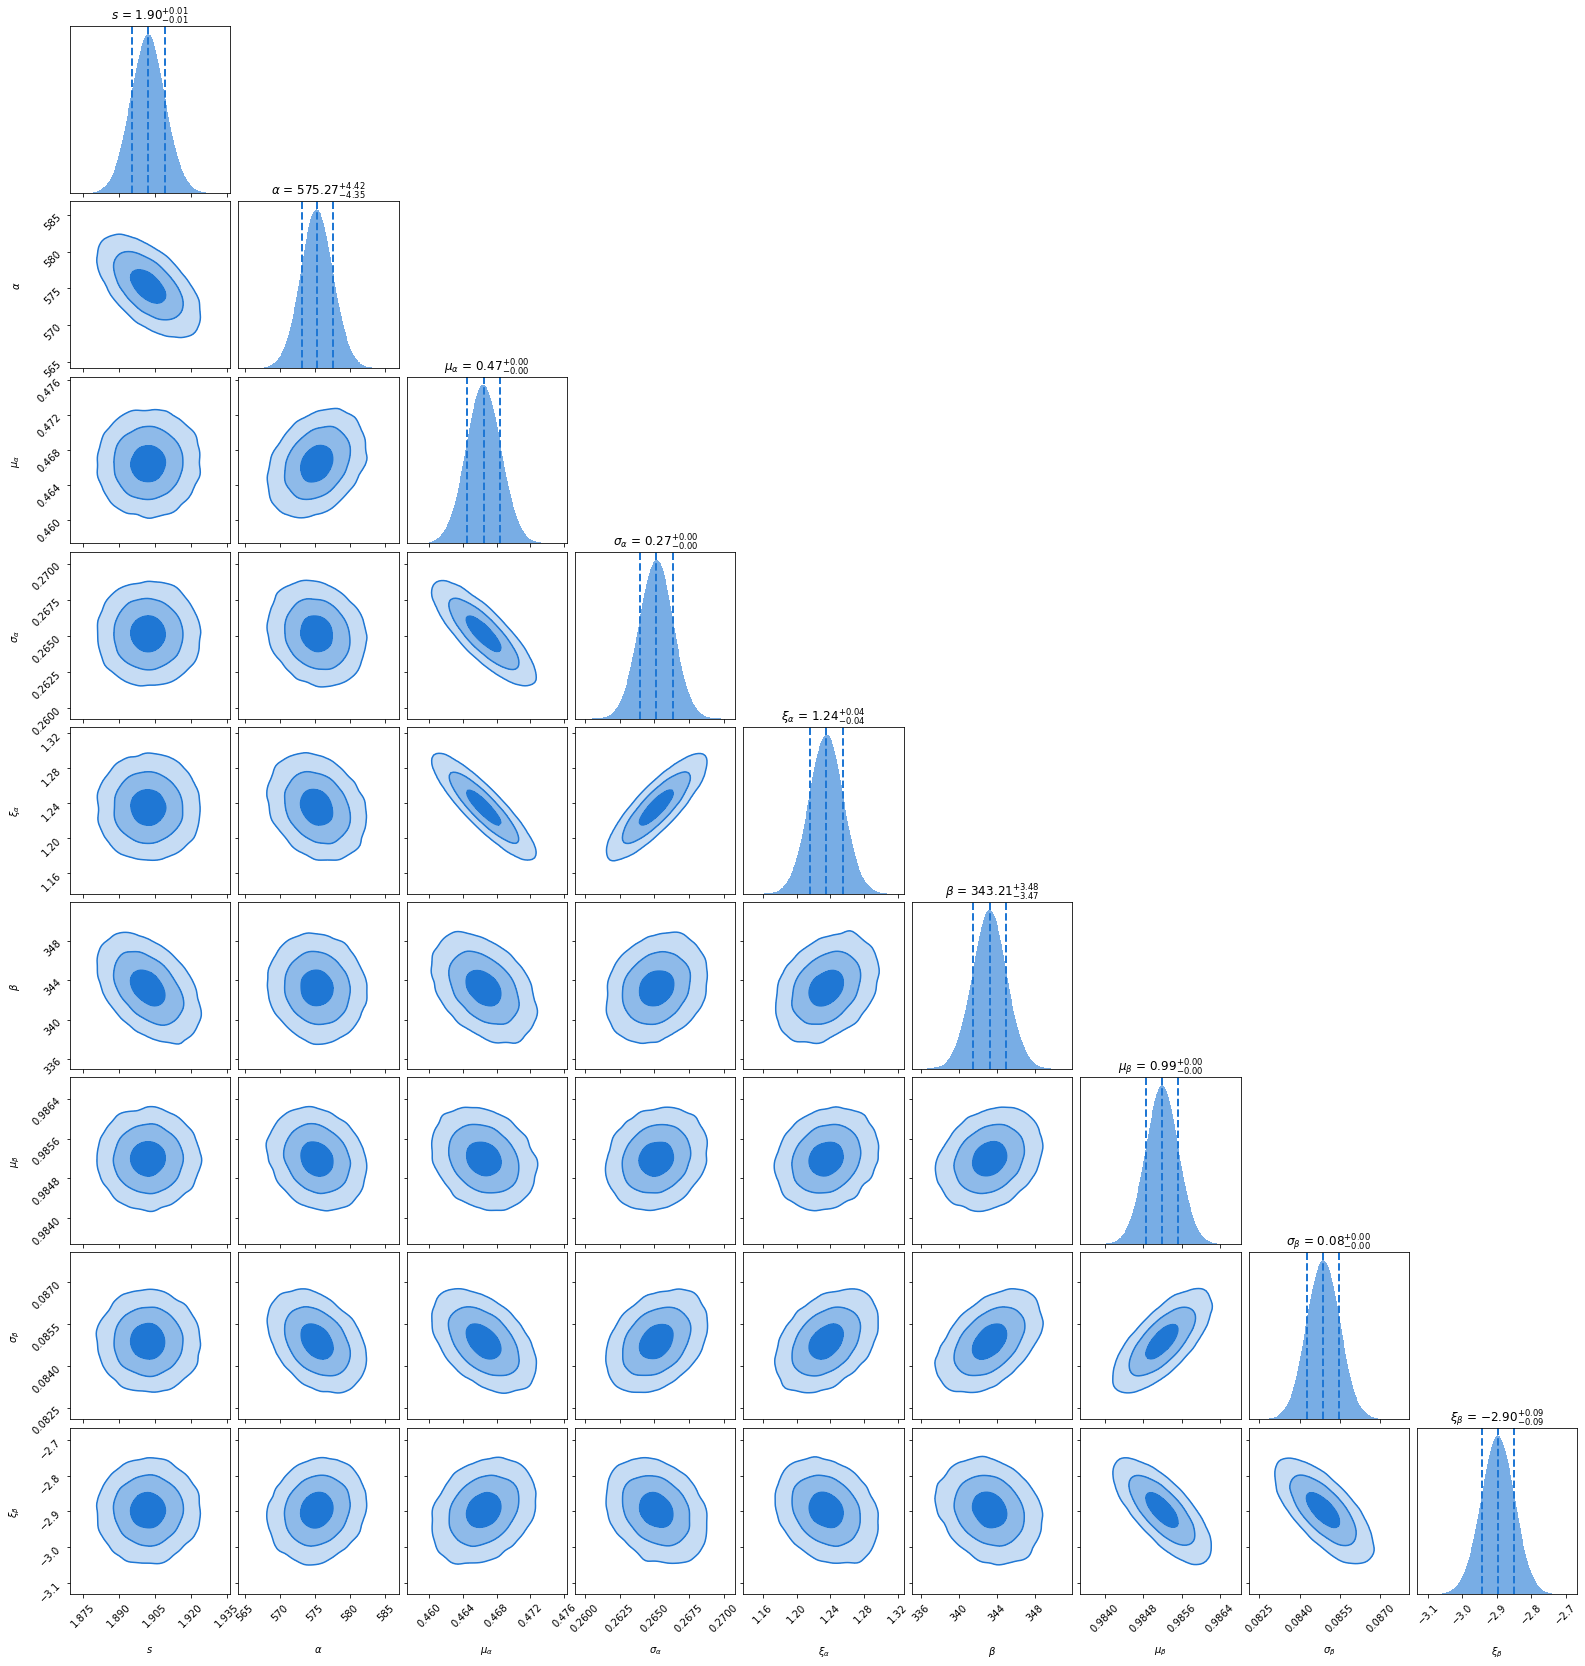

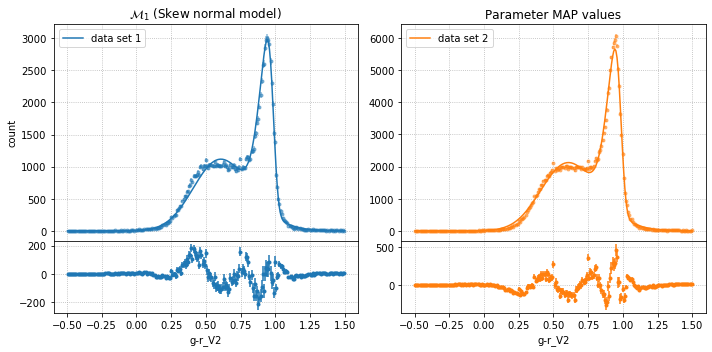

In [18]:


#for V2
print("V2")
plot_hist(data1_wall_v2,data2_void_v2,bins_,label_v2)
print("Running Model 1 using V2...")

#model 1
Model_1_fit(bounds1,data1_wall_v2,data2_void_v2,bins_,label_v2)
Model_1_sampler(prior_xform1,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ1_v2 = Model1_output(data1_wall_v2,data2_void_v2,bins_,label_v2)

print("Running Model 2 using V2...")



running minimizer...this might take a few minutes...
plotting best fit results...


iter: 57 | batch: 0 | bound: 0 | nc: 1 | ncall: 64 | eff(%): 10.106 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.168 | dlogz:    inf >  0.010                                           

running the nested sampler... this might take from minutes to hours...


iter: 11906 | batch: 0 | bound: 151 | nc: 25 | ncall: 279263 | eff(%):  4.256 | loglstar:   -inf < -23583.782 <    inf | logz: -23614.313 +/-  0.347 | dlogz: 9387.110 >  0.010                       /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 12318 | batch: 0 | bound: 159 | nc: 25 | ncall: 291167 | eff(%):  4.223 | loglstar:   -inf < -21970.927 <    inf | logz: -22002.344 +/-  0.353 | dlogz: 8728.362 >  0.010                       /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserW

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 16666 | batch: 0 | bound: 234 | nc: 25 | ncall: 454652 | eff(%):  3.662 | loglstar:   -inf < -12135.916 <    inf | logz: -12175.644 +/-  0.395 | dlogz: 3605.234 >  0.010                       /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 16733 | batch: 0 | bound: 236 | 

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 20465 | batch: 0 | bound: 317 | nc: 25 | ncall: 734832 | eff(%):  2.783 | loglstar:   -inf < -7189.867 <    inf | logz: -7235.938 +/-  0.426 | dlogz: 2271.623 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 20598 | batch: 0 | bound: 320 | 

/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 23689 | batch: 0 | bound: 391 | nc: 25 | ncall: 1156285 | eff(%):  2.048 | loglstar:   -inf < -5142.493 <    inf | logz: -5194.502 +/-  0.452 | dlogz: 1058.786 >  0.010                        /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:243: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 23802 | batch: 0 | bound: 394 | 

sampler output saved as pickle file 'sampler_results_model2_g-r_V2'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 5.79589501e+02  4.55783481e-01  2.70967991e-01  1.22018564e+00
  3.38380641e+02  9.86737145e-01  8.71208303e-02 -2.95670809e+00
  1.08500266e+03  4.69157134e-01  2.64230995e-01  1.27756280e+00
  6.61423413e+02  9.84922414e-01  8.53623125e-02 -2.94933579e+00]
Best fit results: 
Bayesian Evidence for model 2 :  -3686.4509685615667
Log of Baye's Factor for g-r using V2 is:  -71.0936121343041


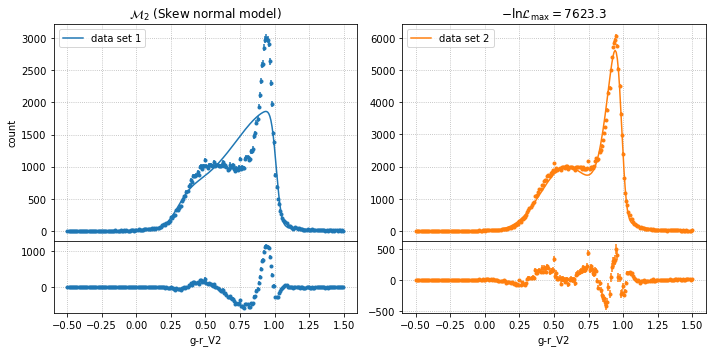

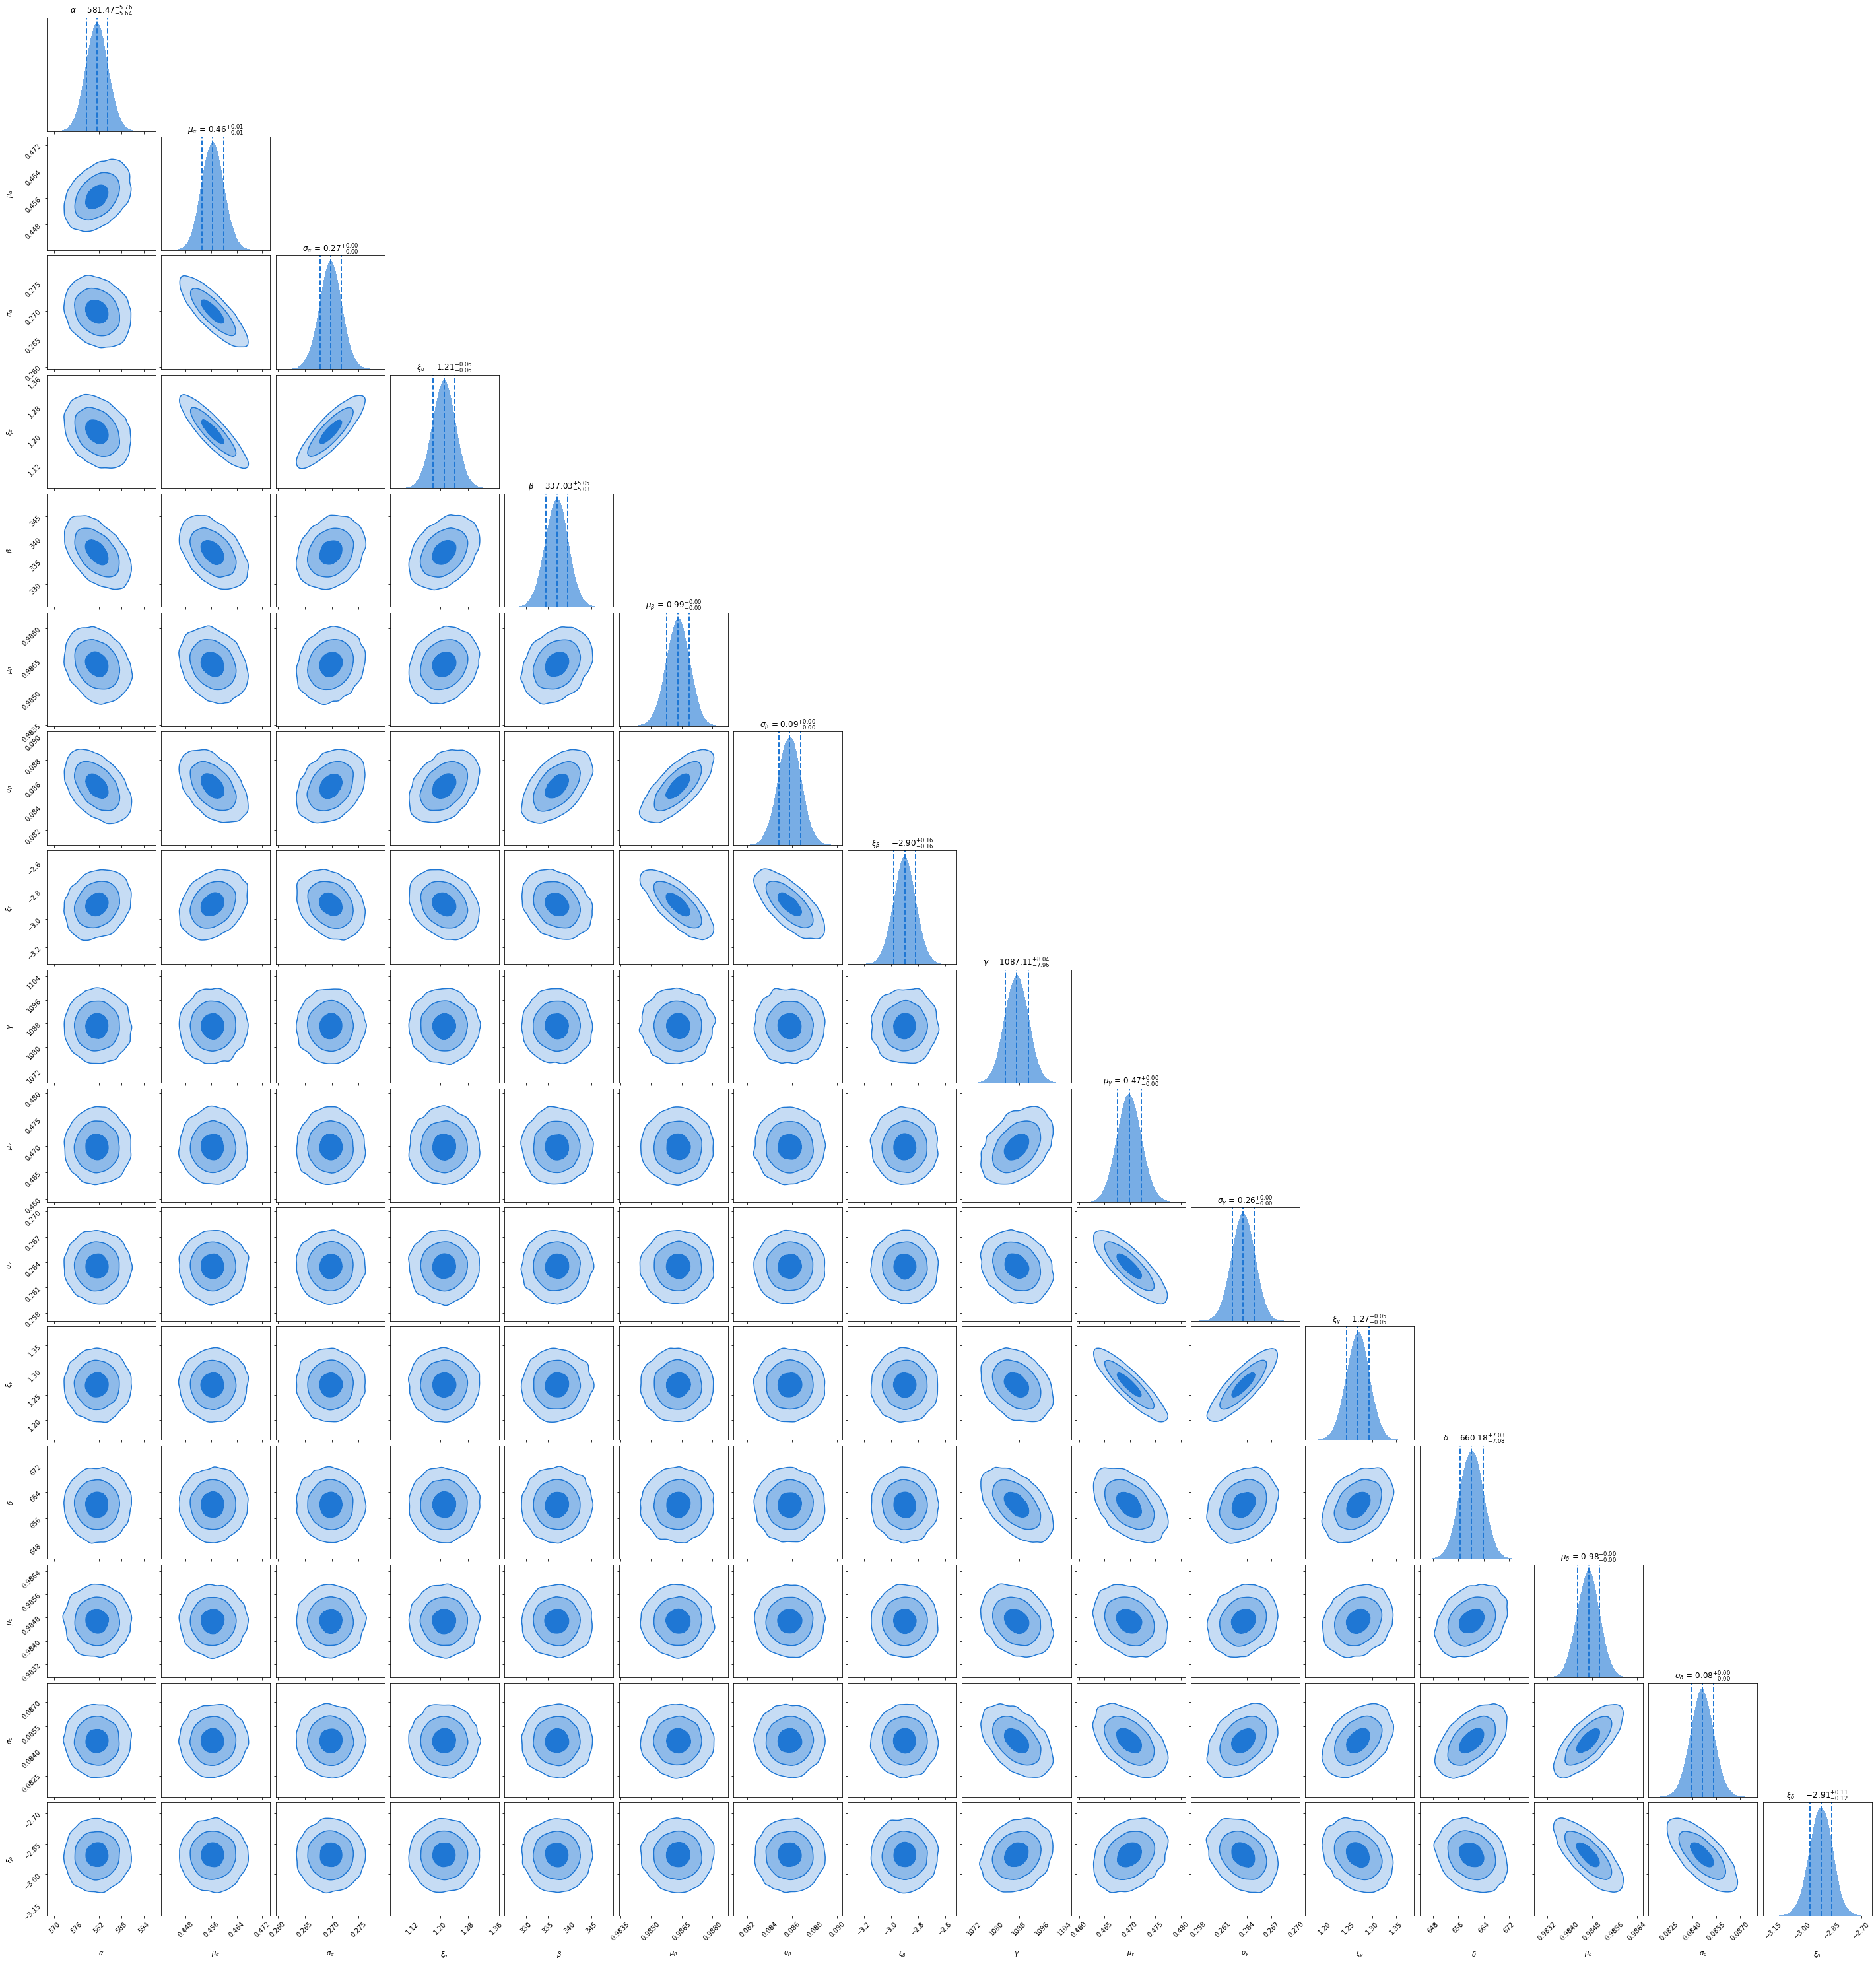

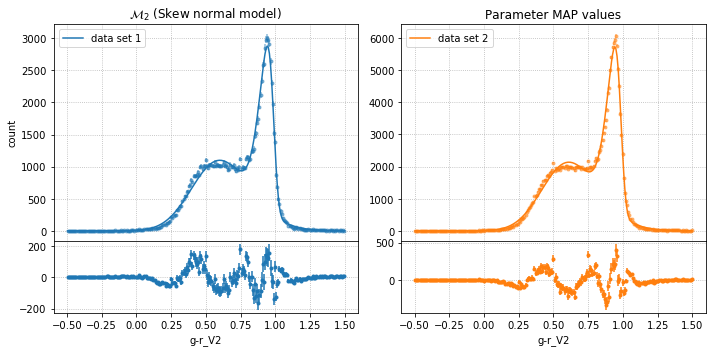

In [19]:
#model2
Model_2_fit(bounds2,data1_wall_v2,data2_void_v2,bins_,label_v2)
Model_2_sampler(prior_xform2,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ2_v2 = Model2_output(data1_wall_v2,data2_void_v2,bins_,label_v2)


#Baye's Factor
lnB12_v2 = lnZ1_v2 - lnZ2_v2
logB12_v2 = 0.434 * lnB12_v2

print("Log of Baye's Factor for g-r using V2 is: ", logB12_v2)